In [1]:
!pip install rouge_score -q

In [2]:
import pandas as pd
import numpy as np
import os

from tqdm import tqdm

import matplotlib.pyplot as plt

from datasets import load_metric

In [3]:
metric = load_metric("rouge")

In [5]:
model_names = ['bert-tiny', 't5-small', 'distil-roberta', 'bart-small']
seeds = [15, 42, 97]

In [6]:
output_data = []

for model_name in model_names:
    for seed in seeds:
       
        df = pd.read_csv(f"/kaggle/input/outputs-summarization/{model_name}_{seed}.csv")
        rouge_measures = metric.compute(predictions=df['pred'], references=df['summary'])
        output_data.append({'model': model_name,
                            'seed': seed,
                            'precision_rouge1': rouge_measures['rouge1'][1][0],
                            'recall_rouge1': rouge_measures['rouge1'][1][1],
                            'fmeasure_rouge1': rouge_measures['rouge1'][1][2],
                            'precision_rouge2': rouge_measures['rouge2'][1][0],
                            'recall_rouge2': rouge_measures['rouge2'][1][1],
                            'fmeasure_rouge2': rouge_measures['rouge2'][1][2],
                            'precision_rougeL': rouge_measures['rougeL'][1][0],
                            'recall_rougeL': rouge_measures['rougeL'][1][1],
                            'fmeasure_rougeL': rouge_measures['rougeL'][1][2],
                            'precision_rougeLsum': rouge_measures['rougeLsum'][1][0],
                            'recall_rougeLsum': rouge_measures['rougeLsum'][1][1],
                            'fmeasure_rougeLsum': rouge_measures['rougeLsum'][1][2]
                           })

df_measures = pd.DataFrame(output_data)

In [7]:
df_measures

,model,seed,precision_rouge1,recall_rouge1,fmeasure_rouge1,precision_rouge2,recall_rouge2,fmeasure_rouge2,precision_rougeL,recall_rougeL,fmeasure_rougeL,precision_rougeLsum,recall_rougeLsum,fmeasure_rougeLsum
0,bert-tiny,15,0.242054,0.186030,0.206934,0.053650,0.041322,0.045855,0.202483,0.156587,0.173669,0.202463,0.156569,0.173678
1,bert-tiny,42,0.242054,0.186030,0.206934,0.053650,0.041322,0.045855,0.202483,0.156587,0.173669,0.202463,0.156569,0.173678
2,bert-tiny,97,0.242054,0.186030,0.206934,0.053650,0.041322,0.045855,0.202483,0.156587,0.173669,0.202463,0.156569,0.173678
3,t5-small,15,0.331195,0.199730,0.243335,0.089746,0.053357,0.065236,0.266497,0.160873,0.195839,0.266547,0.160900,0.195885
4,t5-small,42,0.331195,0.199730,0.243335,0.089746,0.053357,0.065236,0.266497,0.160873,0.195839,0.266547,0.160900,0.195885
5,t5-small,97,0.331195,0.199730,0.243335,0.089746,0.053357,0.065236,0.266497,0.160873,0.195839,0.266547,0.160900,0.195885
6,distil-roberta,15,0.346767,0.241713,0.279875,0.108715,0.075331,0.087335,0.281645,0.197065,0.227738,0.281722,0.197101,0.227778
7,distil-roberta,42,0.346767,0.241713,0.279875,0.108715,0.075331,0.087335,0.281645,0.197065,0.227738,0.281722,0.197101,0.227778
8,distil-roberta,97,0.346767,0.241713,0.279875,0.108715,0.075331,0.087335,0.281645,0.197065,0.227738,0.281722,0.197101,0.227778
9,bart-small,15,0.339512,0.096553,0.147550,0.093349,0.024146,0.037359,0.303132,0.086226,0.131674,0.303159,0.086220,0.131677


In [8]:
df_aggregated = df_measures.drop('seed', axis=1).groupby('model', as_index=False).mean()
df_aggregated

,model,precision_rouge1,recall_rouge1,fmeasure_rouge1,precision_rouge2,recall_rouge2,fmeasure_rouge2,precision_rougeL,recall_rougeL,fmeasure_rougeL,precision_rougeLsum,recall_rougeLsum,fmeasure_rougeLsum
0,bart-small,0.339512,0.096553,0.147550,0.093349,0.024146,0.037359,0.303132,0.086226,0.131674,0.303159,0.086220,0.131677
1,bert-tiny,0.242054,0.186030,0.206934,0.053650,0.041322,0.045855,0.202483,0.156587,0.173669,0.202463,0.156569,0.173678
2,distil-roberta,0.346767,0.241713,0.279875,0.108715,0.075331,0.087335,0.281645,0.197065,0.227738,0.281722,0.197101,0.227778
3,t5-small,0.331195,0.199730,0.243335,0.089746,0.053357,0.065236,0.266497,0.160873,0.195839,0.266547,0.160900,0.195885


In [9]:
output_pegasus = []
df_pegasus = pd.read_csv("/kaggle/input/outputs-summarization/pegasus.csv")
rouge_measures_pegasus = metric.compute(predictions=df_pegasus['pred'], references=df_pegasus['summary'])
output_pegasus.append({'model': 'pegasus',
                    'precision_rouge1': rouge_measures_pegasus['rouge1'][1][0],
                    'recall_rouge1': rouge_measures_pegasus['rouge1'][1][1],
                    'fmeasure_rouge1': rouge_measures_pegasus['rouge1'][1][2],
                    'precision_rouge2': rouge_measures_pegasus['rouge2'][1][0],
                    'recall_rouge2': rouge_measures_pegasus['rouge2'][1][1],
                    'fmeasure_rouge2': rouge_measures_pegasus['rouge2'][1][2],
                    'precision_rougeL': rouge_measures_pegasus['rougeL'][1][0],
                    'recall_rougeL': rouge_measures_pegasus['rougeL'][1][1],
                    'fmeasure_rougeL': rouge_measures_pegasus['rougeL'][1][2],
                    'precision_rougeLsum': rouge_measures_pegasus['rougeLsum'][1][0],
                    'recall_rougeLsum': rouge_measures_pegasus['rougeLsum'][1][1],
                    'fmeasure_rougeLsum': rouge_measures_pegasus['rougeLsum'][1][2]
                   })

In [10]:
df_aggregated = df_aggregated.append(output_pegasus).reset_index(drop=True)
df_aggregated

,model,precision_rouge1,recall_rouge1,fmeasure_rouge1,precision_rouge2,recall_rouge2,fmeasure_rouge2,precision_rougeL,recall_rougeL,fmeasure_rougeL,precision_rougeLsum,recall_rougeLsum,fmeasure_rougeLsum
0,bart-small,0.339512,0.096553,0.147550,0.093349,0.024146,0.037359,0.303132,0.086226,0.131674,0.303159,0.086220,0.131677
1,bert-tiny,0.242054,0.186030,0.206934,0.053650,0.041322,0.045855,0.202483,0.156587,0.173669,0.202463,0.156569,0.173678
2,distil-roberta,0.346767,0.241713,0.279875,0.108715,0.075331,0.087335,0.281645,0.197065,0.227738,0.281722,0.197101,0.227778
3,t5-small,0.331195,0.199730,0.243335,0.089746,0.053357,0.065236,0.266497,0.160873,0.195839,0.266547,0.160900,0.195885
4,pegasus,0.391192,0.371240,0.371372,0.166575,0.155211,0.156926,0.316473,0.299327,0.300018,0.316507,0.299322,0.300001


In [11]:
def plot_results(metric, df):
    ind = np.arange(4) 
    width = 0.15

    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    rouge_list = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
    model_names = ['bert-tiny', 't5-small', 'distil-roberta', 'bart-small', 'pegasus']

    w, h, dpi = 1200, 700, 100
    fig, ax = plt.subplots(figsize=(w/dpi, h/dpi), dpi=dpi)

    for i, model in enumerate(model_names):
        measures = df.loc[df['model']==model]
        y = []
        for r in rouge_list:
            y.append(float(measures[metric + '_' + r]))

        plt.bar(ind + i * width, y, width, color = color[i])

    plt.ylabel('scores')
    plt.title(metric + " score")

    plt.xticks(ind+width,['Ruoge1', 'Ruoge2', 'RuogeL', 'RuogeLsum'])
    plt.legend(model_names)
    plt.show()
    

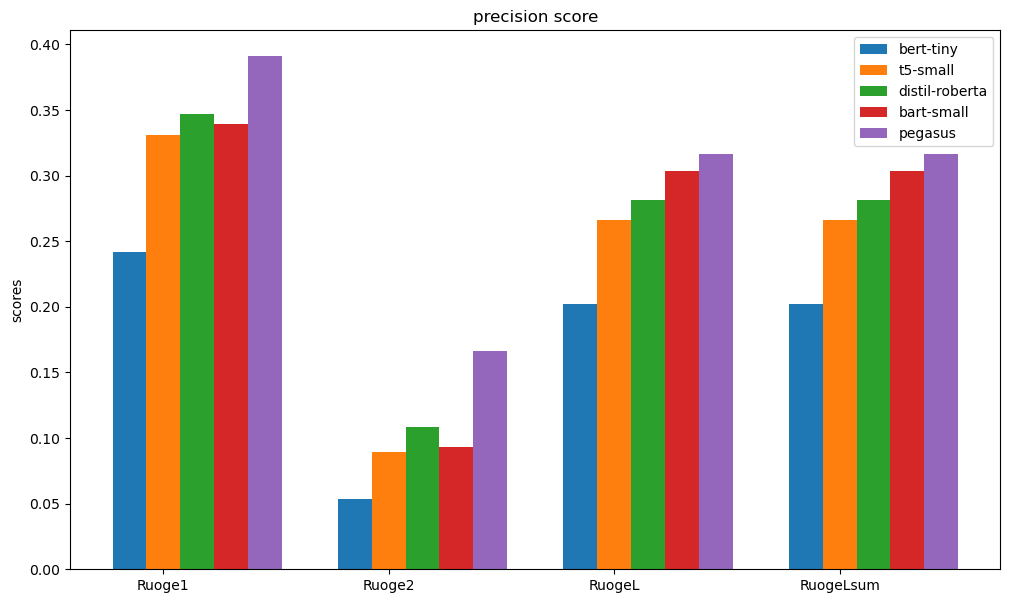

In [12]:
plot_results('precision', df_aggregated)

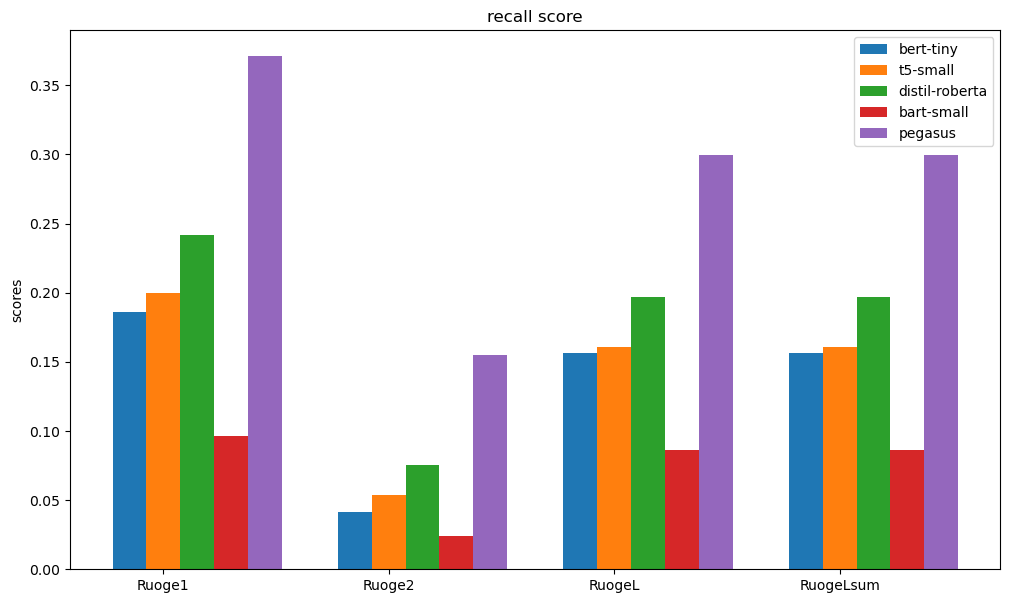

In [13]:
plot_results('recall', df_aggregated)

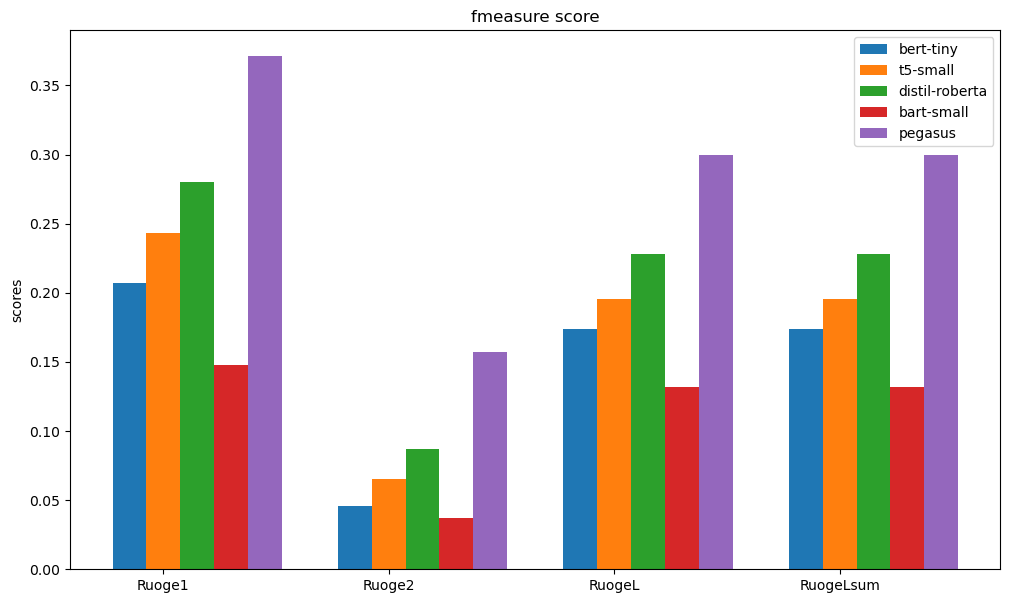

In [14]:
plot_results('fmeasure', df_aggregated)